# INTRODUCTION TO EXPLORATORY DATA ANALYSIS (EDA)

Machine learning is a subset of Data Science. In Machine Learning, we build models that are capable of learning from data without it being explicitly programmed with the help of predefined algorithms.
-   Before starting the EDA process, its quite important to have a good understanding of the data science pipeline and your role in it as a data scientist. I believe this is what makes Data Science as the sexiest job of the 21st century. [Harvard Business Review](https://hbr.org/2021/10/data-scientist-the-sexiest-job-of-the-21st-century)

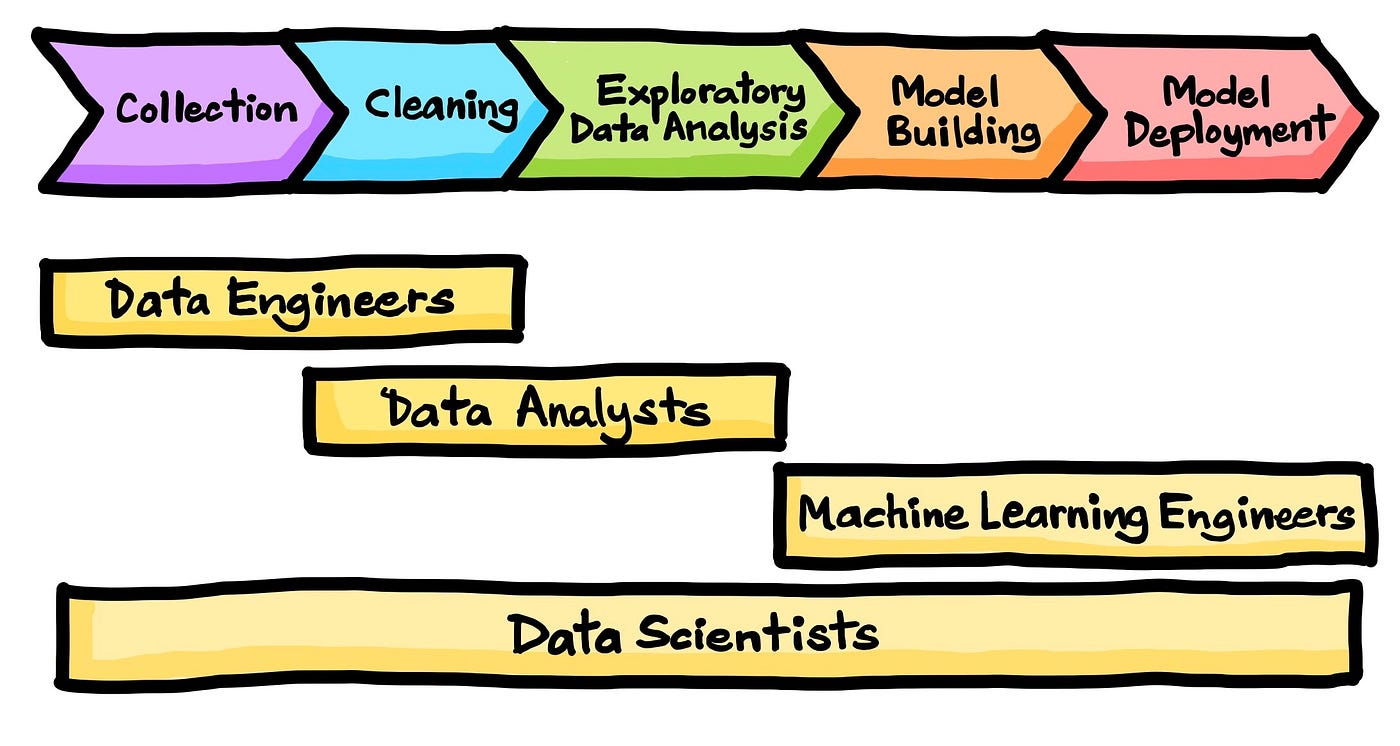


## EXPLORATORY DATA ANALYSIS

The science in data science is EDA. This is where you have to experiment with your data. EDA is an empirical process that leverages scientific methods to **experiement, understand**, and **find relationships** between the features in your dataset to generate insights and validate hypothesis.

EDA is an iterative process, sometimes it includes PDA, Data Cleaning, **one variable, two variable**, and **multi-variable analysis**. It will help you understand the strucure of your data, discover patterns and gain insights.

For most dataset, it is advisable to carry out your EDA first before data cleaning. This will help you have a good knowledge of your dataset before commencing any form of manipulation, deletion or transformation.

EDA starts by understanding the distribution of your data. It's essential to know the **measures of center,** such as mean, median, and mode, as well as the **measure of spread and variability**. This knowledge helps you identify outliers, which are data points significantly different from others, and handle them appropriately.

**There are two broad reasons for EDA**
1.  To prepare data for machine learning models.
2.  To understand patterns and insights in data more generally.

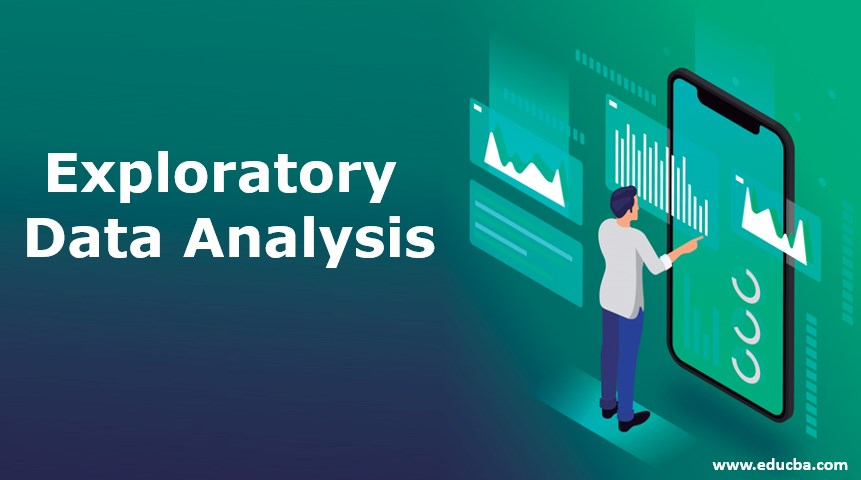

**What Are The Best Practices for EDA?**

1.  **Understand Your Data:** Before embarking on any analysis, it is crucial to familiarize yourself with the dataset by carrying out preliminary analysis (PDA)
2.  **Visualize Your Data:** To gain a quick insight into what your data represents and what it is saying, you have to visualize. This will help you to have a clearer picture of your data.
3.  **Handle Missing Data:** It is essential to identify and understand the nature of missing values in your dataset. Decide on any appropriate strategy for handling mmissing data. Whatever approach you choose, ensure transparency in your methods to maintain the reproducibility of your analysis.
4.  **Check for Outliers:** Ensure to consider the context of your analysis and the nature of the data when deciding whether to keep or remove outliers. In some cases, outliers may represent valid observations and should be retained; in others, they may indicate errors and should be removed.
5.  **Explore Relationships:** EDA is not just about exploring individual variables but also about understanding the relationships between variables. During your exploration look for tends, dependencies, and potential confounding factors that may influence your analysis. Understanding these relationships is crucial for making informed decisions and deriving meaningful insights from your data.
6.  **Segment Your Data:** Data segmentation involves dividing your dataset into meaningful categories or segments to analyze patterns and trends more effectively. By segmenting data based on relevant criteria such as demographics, geography, or behavior, you can gain deeper insights and tailor your analysis to specific groups.
7.  **Use Descriptive Statistics:** Descriptive statistics, such as mean, median, standard deviation, and quartiles, provide a summary of your data's central tendency and dispersion. These statistics help you understand the distribution of your data and identify outerliers or patterns that may require further investigation.
8.  **Consider Time Trends:** Analyzing time trends is crucial if your data has a temporal component. Time series analysis can reveal patterns, seasonality, and trends over time. Visualizing data using line charts or seasonal decomposition plots can help you understand how variables change over different periods.
9.  **Assess Multicollinearity:** Multicollinearity occurs when independent variables in a regression model are highly correlated, leading to unstable estimates. To assess multicollinearity, calculate correlation coefficients between predictors and consider using variance inflation factors (VIFs) to identify problematic variables.
10. **Document Your Process:** Documenting your exploratory data analysis (EDA) process is essential for reproducibility and collaboration. Keep a record of the steps you take, the insights you uncover, and any decisions you make during the analysis. This documentation ensures that others can understand and reproduce your analysis, leading to more reliable results.



[wine quality dataset](https://archive.ics.uci.edu/static/public/186/wine+quality.zip)

<hr>

### **0.  Data Ingestion, Preliminary Data Analysis**

<hr>

In [2]:
%%capture

%pip install seaborn matplotlib pandas numpy

In [3]:
import seaborn as sns 
import matplotlib.pyplot as plt
import zipfile
import pandas as pd
import numpy as np
import os

In [4]:
zip_path = r"C:\Users\ncc\Desktop\ai_engineering\module_3\week12\wine+quality.zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.printdir()

File Name                                             Modified             Size
winequality-red.csv                            2023-05-22 22:24:00        84199
winequality-white.csv                          2023-05-22 22:24:00       264426
winequality.names                              2023-05-22 22:24:00         3305


In [5]:
with zipfile.ZipFile(zip_path) as z:
    with z.open('winequality-red.csv') as f:
        red_wine = pd.read_csv(f, sep = ";")

In [6]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
red_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
# picking out the numerical columns and get the descriptions
num_features = red_wine.select_dtypes(include = ['float64', 'int64']).columns
red_wine[num_features].describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [9]:
red_wine.quality.unique()

array([5, 6, 7, 4, 8, 3])

| **Numeric** | **Category** | **Meaning** |
|-------------|--------------|-------------|
| 3-4 | **Low** | Poor quality wines |
| 5-6 | **Medium** | Average/typical wines |
| 7-8+ | **High** | Premium-quality wines |

In [10]:
def map_quality_category(x):
    if x <= 4:
        return 'Low'
    elif x <= 6:
        return 'Medium'
    else:
        return 'High'
    
# applying function
red_wine['quality_label'] = red_wine['quality'].apply(map_quality_category)

In [11]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Medium


In [12]:
# making a copy of the data
df = red_wine.copy()

<hr>

### **1.  Univariate analysis**

<hr>

Analysing one column or one feature at a time.

What are we looking out for when carrying out univariate analysis?
1.  Distribution - Normal, poisson, binomial, Bernoulli distributions
2.  How they are organized around the centre - measure of central tendency (mean, median, and mode).
3.  How they are dispersed from the centre - measure of dispersion (standard deviation, variance, kurtosis, skewness)
4.  The type of plots that can used include **histogram, boxplots, countplot**.

The idea behind univariate analysis is to understand each variable individually, its distribution, central tendency, spread, shape, and presence of outliers..

This helps you decide:
-   Which variables may need scaling, transformation, or binning
-   Whether skewness could affect modelling assumptions (e.g., for regression)
-   Which variables are categorical vs continous
-   How quality labels (target variable) are distributed

<hr>

In [13]:
def univariate_numerical_eda(df, column):
    """
    Performs univariate EDA on a single numerical column.
    Displays summary statistics, skewness, kurtosis, histogram, KDE, and boxplot.
    """
    print(f"Feature: {column}")
    print("= "*30)
    print(df[column].describe().to_frame())
    print(f"\nSkewness: {df[column].skew():.3f}")
    print(f"Kurtosis: {df[column].kurt():.3f}")

    plt.figure(figsize = (12, 4))

    # histogram + KDE
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde = True, bins = 30, color = 'teal')
    plt.title(f'\n Distribution of {column}', fontsize = 13)
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x = df[column], color = 'teal')
    plt.title(f'\n Boxplot of {column}', fontsize = 13)

    plt.tight_layout()
    plt.show()

    # optional note on transformation
    if abs(df[column].skew()) > 1:
        print(f"\n {column} is highly skewed. Consider log or Box-Cox transformation.")
    elif abs(df[column].skew()) > 0.5:
        print(f"{column} is moderately skewed.")
    else:
        print(f"{column} is fairly symmetric.")

Feature: fixed acidity
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
       fixed acidity
count    1599.000000
mean        8.319637
std         1.741096
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000

Skewness: 0.983
Kurtosis: 1.132


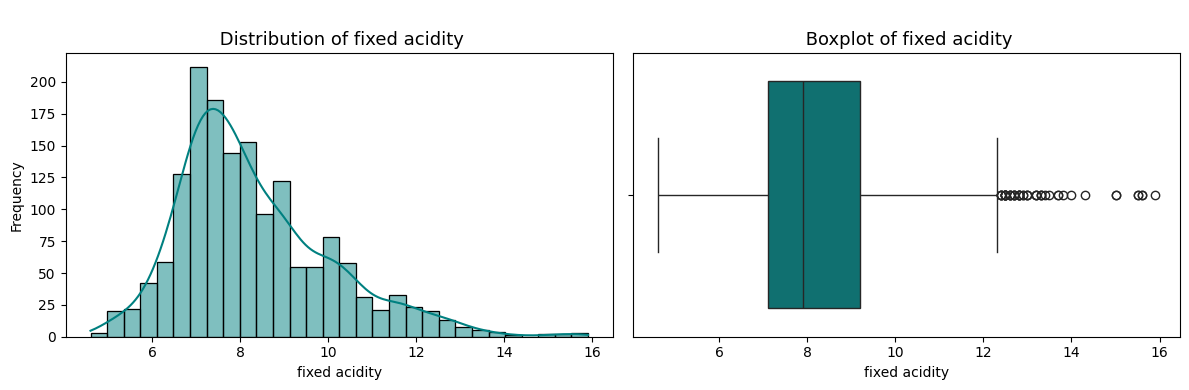

fixed acidity is moderately skewed.


In [14]:
# 1. fixed acidity
univariate_numerical_eda(df, 'fixed acidity')

Feature: fixed acidity
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
       fixed acidity
count    1599.000000
mean        8.319637
std         1.741096
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000

Skewness: 0.983
Kurtosis: 1.132


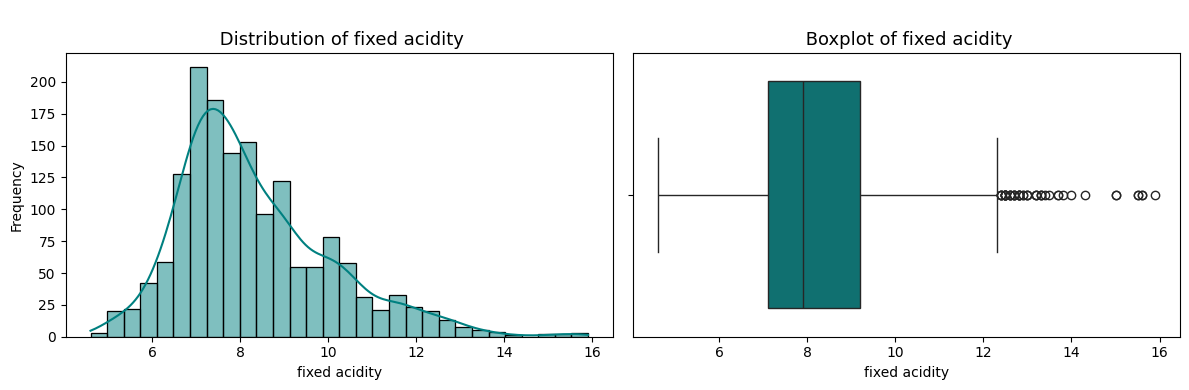

fixed acidity is moderately skewed.
Feature: volatile acidity
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
       volatile acidity
count       1599.000000
mean           0.527821
std            0.179060
min            0.120000
25%            0.390000
50%            0.520000
75%            0.640000
max            1.580000

Skewness: 0.672
Kurtosis: 1.226


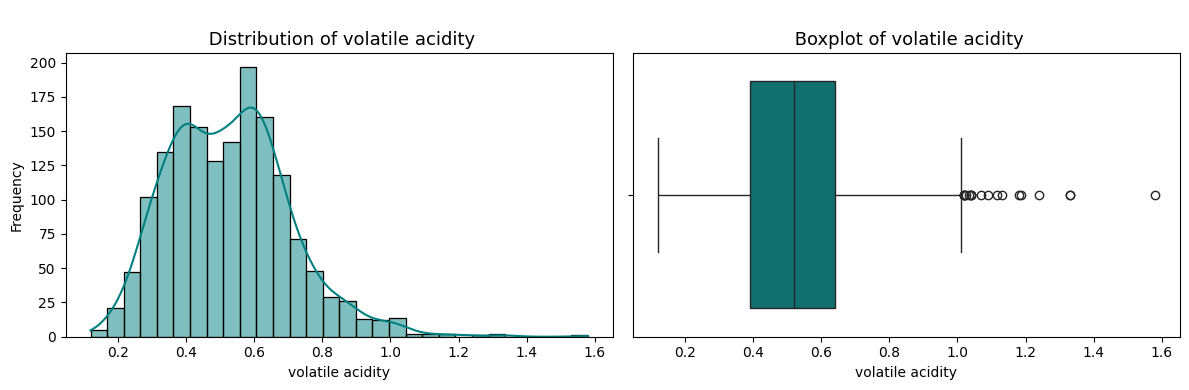

volatile acidity is moderately skewed.
Feature: citric acid
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
       citric acid
count  1599.000000
mean      0.270976
std       0.194801
min       0.000000
25%       0.090000
50%       0.260000
75%       0.420000
max       1.000000

Skewness: 0.318
Kurtosis: -0.789


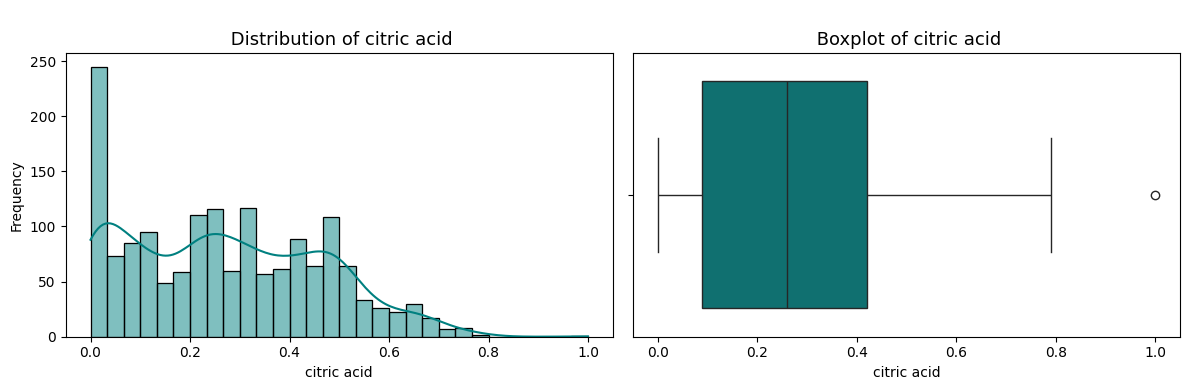

citric acid is fairly symmetric.
Feature: residual sugar
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
       residual sugar
count     1599.000000
mean         2.538806
std          1.409928
min          0.900000
25%          1.900000
50%          2.200000
75%          2.600000
max         15.500000

Skewness: 4.541
Kurtosis: 28.618


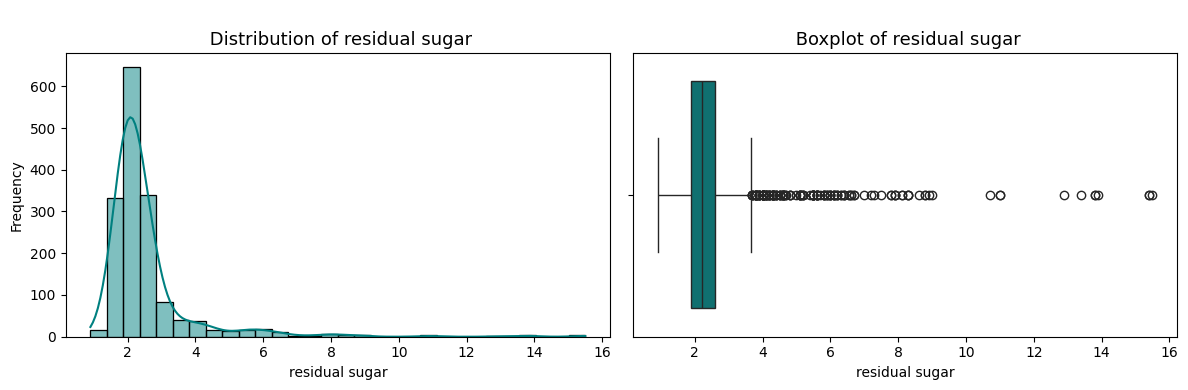


 residual sugar is highly skewed. Consider log or Box-Cox transformation.
Feature: chlorides
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
         chlorides
count  1599.000000
mean      0.087467
std       0.047065
min       0.012000
25%       0.070000
50%       0.079000
75%       0.090000
max       0.611000

Skewness: 5.680
Kurtosis: 41.716


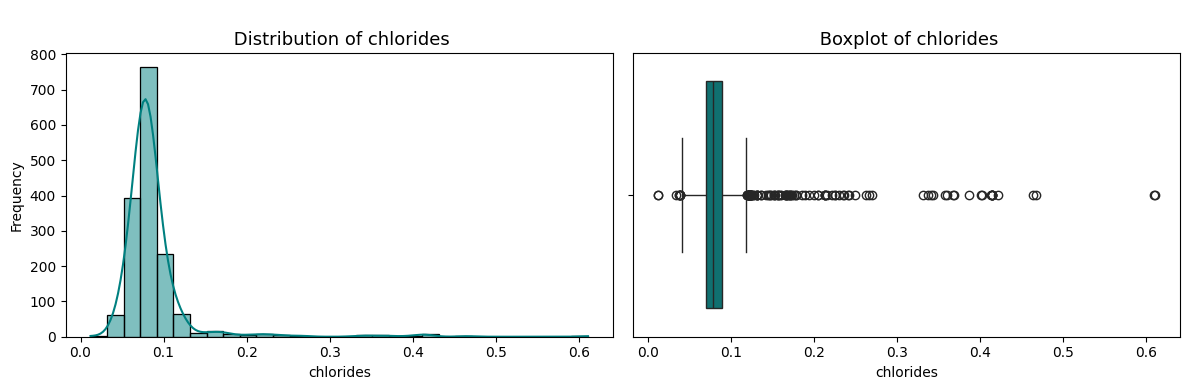


 chlorides is highly skewed. Consider log or Box-Cox transformation.
Feature: free sulfur dioxide
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
       free sulfur dioxide
count          1599.000000
mean             15.874922
std              10.460157
min               1.000000
25%               7.000000
50%              14.000000
75%              21.000000
max              72.000000

Skewness: 1.251
Kurtosis: 2.024


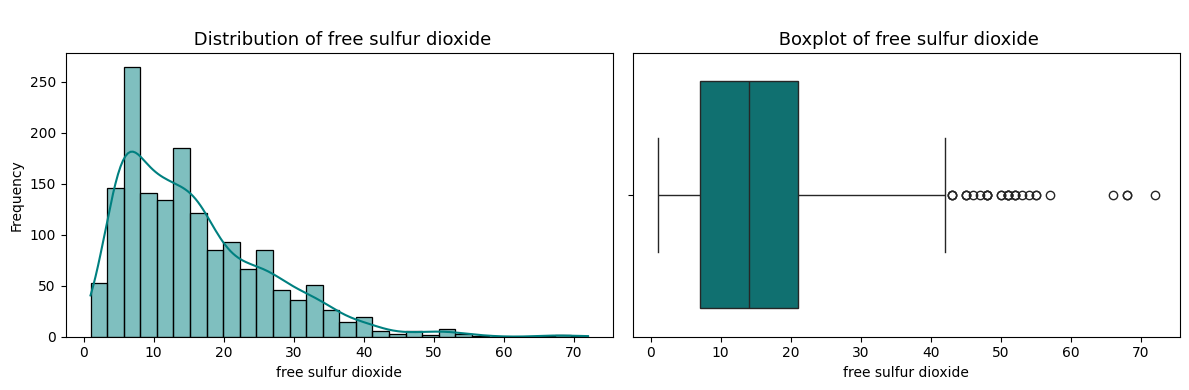


 free sulfur dioxide is highly skewed. Consider log or Box-Cox transformation.
Feature: total sulfur dioxide
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
       total sulfur dioxide
count           1599.000000
mean              46.467792
std               32.895324
min                6.000000
25%               22.000000
50%               38.000000
75%               62.000000
max              289.000000

Skewness: 1.516
Kurtosis: 3.810


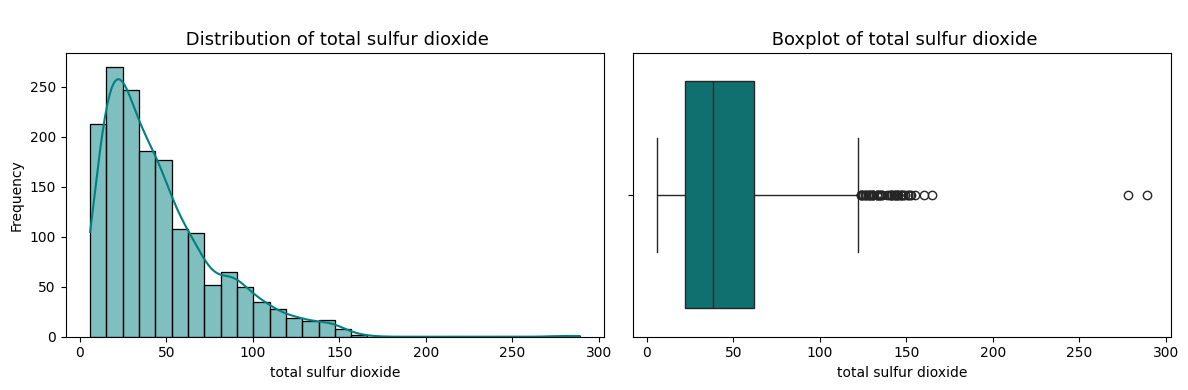


 total sulfur dioxide is highly skewed. Consider log or Box-Cox transformation.
Feature: density
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
           density
count  1599.000000
mean      0.996747
std       0.001887
min       0.990070
25%       0.995600
50%       0.996750
75%       0.997835
max       1.003690

Skewness: 0.071
Kurtosis: 0.934


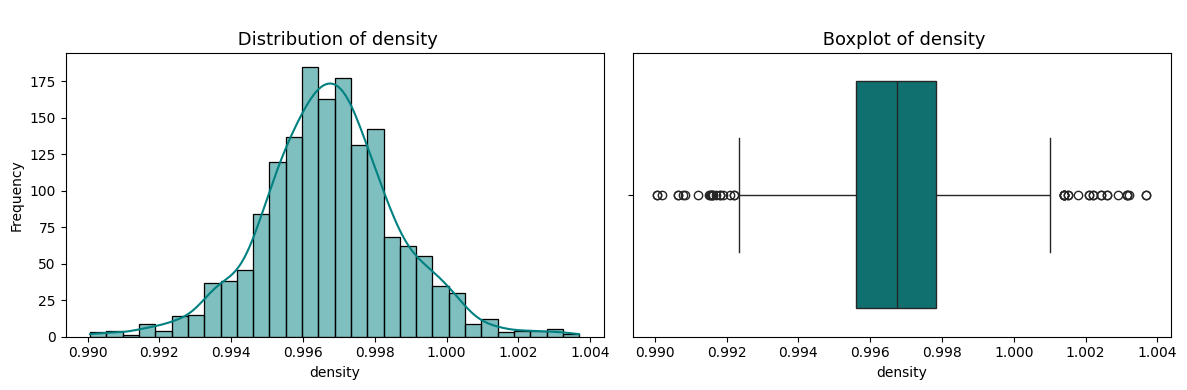

density is fairly symmetric.
Feature: pH
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
                pH
count  1599.000000
mean      3.311113
std       0.154386
min       2.740000
25%       3.210000
50%       3.310000
75%       3.400000
max       4.010000

Skewness: 0.194
Kurtosis: 0.807


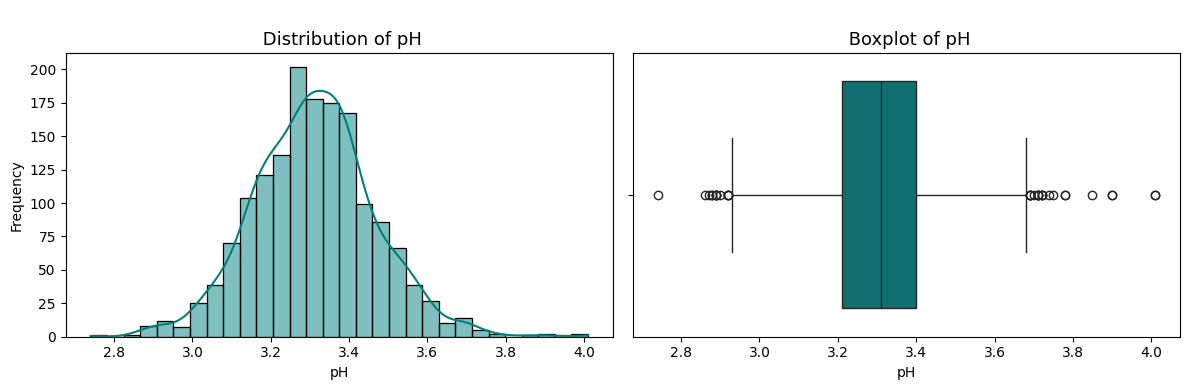

pH is fairly symmetric.
Feature: sulphates
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
         sulphates
count  1599.000000
mean      0.658149
std       0.169507
min       0.330000
25%       0.550000
50%       0.620000
75%       0.730000
max       2.000000

Skewness: 2.429
Kurtosis: 11.720


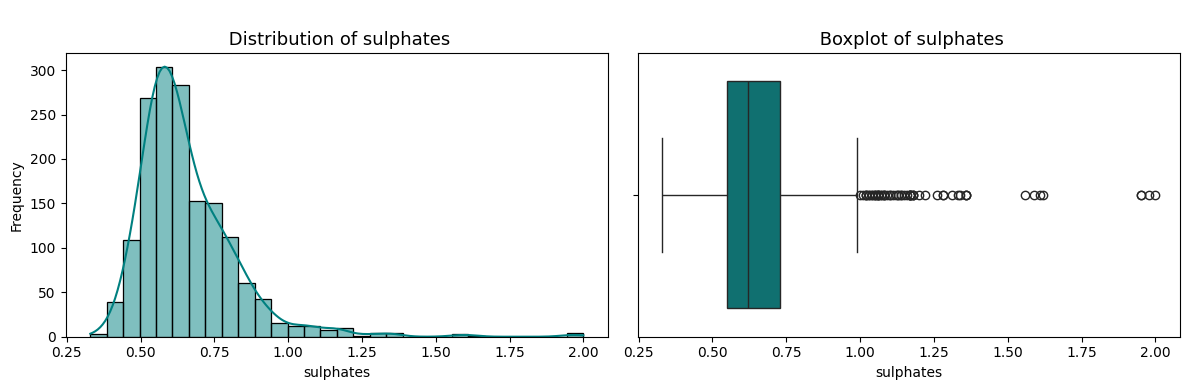


 sulphates is highly skewed. Consider log or Box-Cox transformation.
Feature: alcohol
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
           alcohol
count  1599.000000
mean     10.422983
std       1.065668
min       8.400000
25%       9.500000
50%      10.200000
75%      11.100000
max      14.900000

Skewness: 0.861
Kurtosis: 0.200


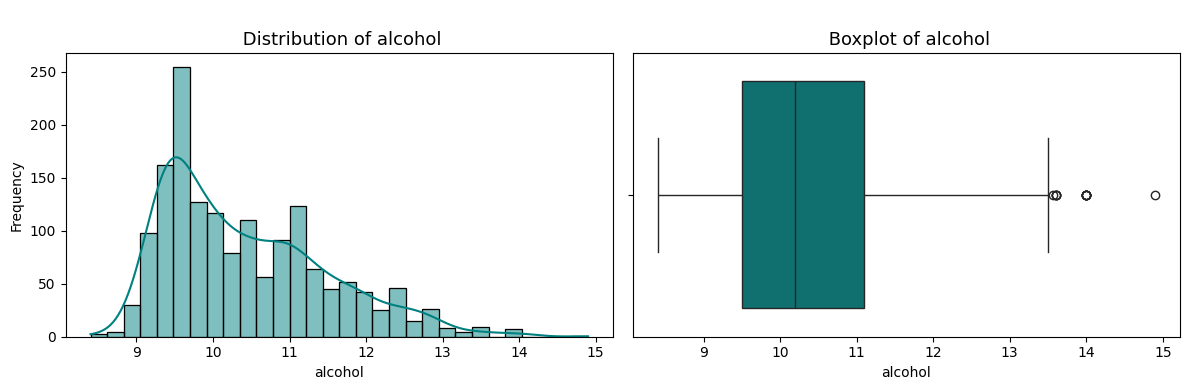

alcohol is moderately skewed.
Feature: quality
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
           quality
count  1599.000000
mean      5.636023
std       0.807569
min       3.000000
25%       5.000000
50%       6.000000
75%       6.000000
max       8.000000

Skewness: 0.218
Kurtosis: 0.297


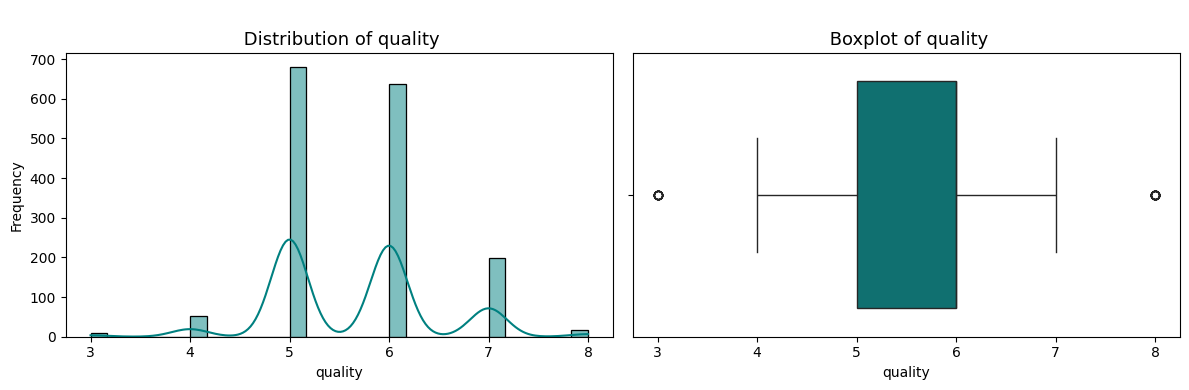

quality is fairly symmetric.


In [15]:
# looping through to save time
for col in num_features:
    univariate_numerical_eda(df, col)

In [16]:
def univariate_categorical_eda(df, column):
    """
    Performs univariate EDA on a categorical or ordinal column.
    Displays frequency table, proportion, and a countplot.
    """
    print(f"Feature: {column}")
    print("= "*30)

    # frequency + proportion
    freq = df[column].value_counts()
    prop = df[column].value_counts(normalize = True) * 100
    summary = pd.DataFrame({'Count': freq, 'Percentage': prop.round(2)})
    print(summary)
    print()

    # visualization
    plt.figure(figsize = (8, 5))
    ax = sns.countplot(x = column, data = df, palette = 'Set2', order = freq.index, color = 'teal')
    plt.title(f'Distribtuion of {column}', fontsize = 13)
    plt.xlabel(column)
    plt.ylabel('Count')

    # annotate each bar with percentage
    total = len(df[column])
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2, height + 1,
                f'{(height/total)*100:.1f}%', ha = 'center')
        
    plt.tight_layout()
    plt.show()

In [17]:
red_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'quality_label'],
      dtype='object')

In [18]:
red_wine['quality_label'].unique()

array(['Medium', 'High', 'Low'], dtype=object)

Feature: quality_label
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
               Count  Percentage
quality_label                   
Medium          1319       82.49
High             217       13.57
Low               63        3.94



C:\Users\ncc\AppData\Local\Temp\ipykernel_11396\359953465.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = column, data = df, palette = 'Set2', order = freq.index, color = 'teal')


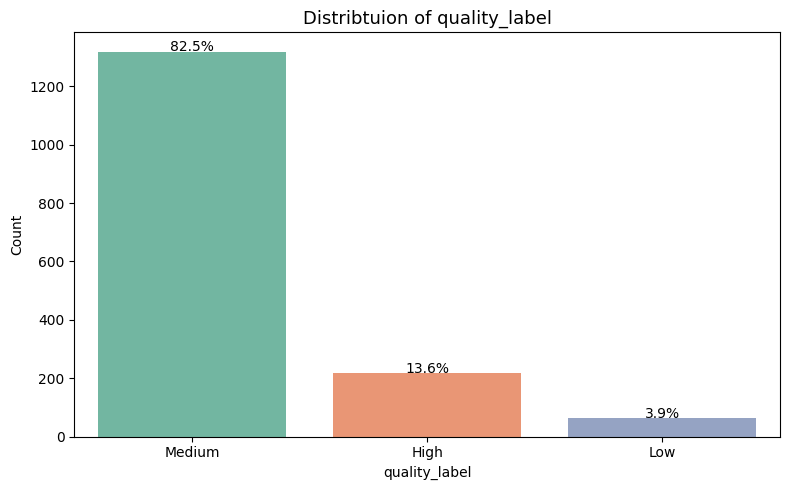

In [19]:
univariate_categorical_eda(red_wine, 'quality_label')

**Key Univariate Findings**

| **Feature Type** | **Observation** | **What It Means/Implication** |
|------------------|-----------------|-------------------------------|
| **Most numeric features** | Continuous, but several (e.g., `residual sugar`, `total sulfur dioxide`, `free sulfur dioxide`) are **right-skewed** | These long tails can distort algorithms sensitive to scale (e.g., linear regression, KNN). We might apply **log or Box-Cox transformation** to normalize. |
| **`alcohol`** | Often roughtly symmetric but **wide range** | Important predictor - normalization or standardization can stabilize learning. |
| **`volatile acidity`** | Often slightly right-skewed | Outliers might indicate poor fermentation we will check relationships with `quality` later. | 
| **Outliters visible in boxplots** | Especially in sulfur-related variables | Before modeling, we must decide: **clip, transform, or leave** (some are natural domain outliers). |
| **`quality` (numeric)** | Discrete integers, concentrated in 5-6 | Dataset is **imbalanced** - middle (Medium quality) dominates. |


**How do sort things out from the insight we have gathered**

| **Insight** | **Why It Matters** | **Actionable Step** |
|-------------|--------------------|---------------------|
| **Skewed variables** | Some algorithms (like linear/logistic regression, SVMs, KNNs) assume features are approximately normal. | Apply transformations (`np.log1p`, `StandardScaler`, etc.) where needed. |
| **Wide feature ranges** | Features measured on different scales (e.g., pH ~3-4, sulfur dioxide ~0-300) can use biased weight learning. | Use **scaling** (e.g., StandardScaler or MinMaxScaler). |
| **Outliers** | May heavily influence mean-based models. | Investigate domain causes - use **IQR-based clipping or robust scaling.** |
| **Imbalanced target** | ML models may favor the majority class ("Medium"). | Use **resampling** (SMOTE, stratified split) or **class weights** later. |
| **Ordinal target (`quality_label`)** | Although `quality` is numeric, its meaing is ordinal | Consider both: regression (numeric quality) or classification (Low/Medium/High). |

In summary, So, at this stage:
-   We understand our variables individually
-   We know where to clean, transform, or normalize
-   We have seen what our class is like (wine quality) in terms of balance

We can now move into Bivariate EDA, to see how these variables relate to each other and to quality

<hr>

### **2.    Bivariate Analysis**

<hr>

This explore **relationships** between **two variables** using **scatter plots, boxplots,** and **bar plots**. This help reveal trends, patterns, and possible associations.
-   Our goals is to understand how two variables relate, especially how input **features** relate to the **target.** This helps us:
    -   to identif predictive features
    -   to detect linear/nonlinear trends
    -   to spot interactions
    -   to see where transformation or encoding may help later


**How to read a boxplot**
| **What you see** | **What it means** |
|------------------|-------------------|
| **Wide box** | High variability - the feature values differ a lot among samples. |
| **Narrow box** | Low variability - values are similar across samples. |
| **Long whiskers** | Some extreme but valid values (large spread overall). |
| **Short whiskers** | Most data clustered tightly. |
| **Many outliers** | Some points lie far from the bulk of data - possibly skewed or irregular. |


**How to read a violin plot**


**How to read a violin plot**

![image.png](attachment:image.png)

Lets compare 

![image.png](attachment:image.png)

1.  A violin plot helps you see **where most of your data values fall** and **how spread out they are** all in one chart.
2.  **How it works**
    -   It combines a **boxplot** (which shows median and spread) with a **density curve** (which shows the shape of the distribution).
    -   The **white dot** in the center = the **median** (middle value).
    -   The **box** shows the **middle 50%** of the data (called the IQR).
    -   The **line** extending from the box shows the **range** (how far values go).
    -   The **width** of the "violin" at any point shows how many data points fall there wider parts mean **more data**, thinner parts mean **less data.**
3.  **Why it's useful:
    -   It shows **how the data is shaped** whether it's balanced (normal), one-sided (skewed), or even has **two peaks** (bimodal).
    -   This is something a normal boxplot can hide.
    -   A **bimodal** dataset (two peaks) and a **flat** dataset (uniform) can look almost the same in a boxplot but a violin plot makes the difference obvious.


| **Violin Plot Element** | **What It Represents** | **How to Interpret It** | **What It Means for Analysis** |
| **Width (Thickness)** | Data density at a given value | The thicker (wider) the section, the more data points there are there | Shows where most observations cluster (the "mode" area) |
| **Center Line/White Dot** | Median value | Middle value of the data | Compare medians across groups to see shifts in central tendency |
| **Black Bar (Box)** | Interquartile range (IQR = 25th-75th percentile) |Where the middle 50% of the data lies | Compact IQR - consistent values; wide IQR - variable data |
| **Overall Height** | Range of data values | Vertical span from minimum to maximum | Larger height - more variation; smaller height - more uniform |
| **Shape (Symmetry)** | Distribution shape (normal, skewed, bimodal) | Left tail longer - negatively skewed; right tail longer - positively skewed | Reveals skewness and potential outliers |
| **Multiple Violins Side-by-Side** | Different categories | Compare distributions directly across groups | Great for spotting which category has higher medians or wider spread |

**Lets start our bivariate analysis**

We can go about it this way, for the sake of simplicity

| **Level** | **Focus** | **Techniques / Tools** |
|-----------|-----------|------------------------|
| **1. Numeric-Numeric** | Correlation and scatterplots | `.corr()`, `sns.heatmap()`, `sns.scatterplot()` |
| **2. Numeric-Categorical** | Feature vs `quality_label` | `sns.boxplot()`, `sns.violinplot()`, group summaries |

In [20]:
# finding the numerical features
num_features = red_wine.select_dtypes(include = ['int64', 'float64']).columns

# converting to dataframe
num_features = pd.DataFrame(red_wine[num_features])
num_features.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


  1.  Numeric to Numeric


Correlation with target

In [21]:
def correlation_with_target(df, target_col, figsize = (10, 2)):
    """
    Plots a heatmap showing correlation of each numeric feature agains target_col.
    Returns a Series of correlations (sorted by absolte magnitude).
    """

    # keep only numeric columns
    numeric_df = df.select_dtypes(include = 'number').copy()
    if target_col not in numeric_df.columns:
        raise ValueError(f"Target column '{target_col}' must be numeric and present in the dataframe.")
    
    # compute correlations of every numeric column with the target
    corrs = numeric_df.corrwith(numeric_df[target_col]).drop(target_col)

    corrs_df = corrs.to_frame(name = 'corr').T # shape (1, n)
    
    plt.figure(figsize = figsize)
    sns.heatmap(
        corrs_df,
        annot = True,
        fmt = ".3f",
        cmap = "coolwarm",
        center = 0,
        vmin = -1,
        vmax = 1,
        cbar_kws = {'orientation': 'vertical', 'shrink': 0.7}
    )
    plt.xticks(rotation = 45, ha = 'right')
    plt.yticks([0], [target_col], rotation = 0)
    plt.title(f'Correlation of numeric features with {target_col}', fontsize = 12)
    plt.tight_layout()
    plt.show()

    # return sorted correlations for downstream use
    return corrs.reindex(corrs.abs().sort_values(ascending = False).index)

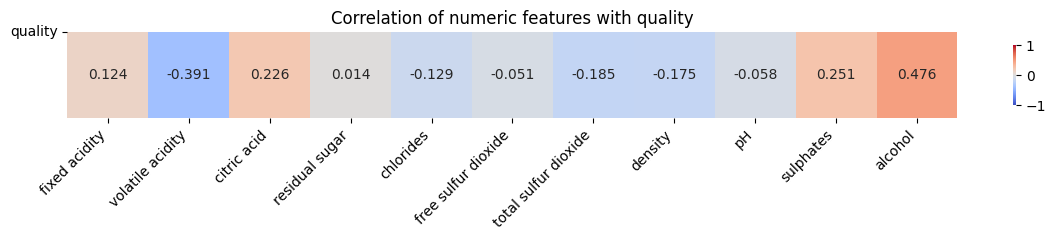

alcohol                 0.476166
volatile acidity       -0.390558
sulphates               0.251397
citric acid             0.226373
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
fixed acidity           0.124052
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
dtype: float64


In [23]:
corr_series = correlation_with_target(df, 'quality', figsize = (12, 2.5))
print(corr_series)

| **Feature** | **Correlation** | **Interpretation** |
|-------------|-----------------|--------------------|
| **alcohol** | +0.48 | Strongest positive - higher alcohol -> higher quality. Likely a key predictive feature. |
| **volatile acidity** | -0.39 | Strong negative - too much volatility (vinegar-like taste) reduces quality. Very important feature. |
| **sulphates** | +0.25 | Moderate positive - contributes to stability and aroma. Helpful but secondary predictor. |
| **citric acid** | +0.23 | Slightly positive - adds freshness; balanced wines score higher. |
| **total sulfur dioxide** | -0.19 | too much preservation reduces quality. |
| **density** | -0.17 | Lower density wines (lighter, less sugar) tend to score higher. |
| **chlorides** | -0.13 | Saltier taste lowers quality. |
| **fixed acidity** | +0.12 | Minor positive - balanced acidity helps |
| **pH** | -0.06 | Weak negative; higher pH (less acidic) slightly lowers quality. |
| **free sulfur dioxide** | -0.05 | Minimal linear relationship. |
| **residual sugar** | +0.01 | Negligible - sweetness isn't driving qualit here. |

**How does this help our model**

| **Action** | **Explanation** |
|------------|-----------------|
| **Keep alcohol, volatile acidity, sulphates, citric acid** | Strong predictors. You'll definitely include them. |
| **Be cautious with total sulfur dioxide & density** | Probably drop unless domain reasoning suggests otherwise. |
| **Interactions to test:** | `alcohol * acidity`, `citric acid * sulphates`, or `density * pH - may capture subtle combined effects. |

In [24]:
from scipy.stats import pearsonr 

def numeric_bivariate_plot(df, x_col, y_col):
    """
    Plots the relationship between two numeric variables with a regression line 
    and displays the correlation coefficient.

    Parameters:
    -----------
    df : pandas.DataFrame
        Dataset containing the numeric columns
    x_col : str
        Name of the first numeric variable (x-axis)
    y_col : str
        Name of the second numeric variable (y-axis)
    """

    # calculate correlation coefficient
    corr, p_value = pearsonr(df[x_col], df[y_col])

    # create plot
    plt.figure(figsize = (8, 5))
    sns.regplot(data = df, x = x_col, y = y_col, scatter_kws = {'alpha': 0.5}, line_kws = {'color': 'red'})
    plt.xlabel(x_col, fontsize = 11)
    plt.ylabel(y_col, fontsize = 11)
    plt.grid(alpha = 0.3)
    plt.show()